In [18]:
import torch
import torch.nn.functional as fun
import matplotlib.pyplot as plt

### Generate random data

In [74]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
y = x.pow(2) + 0.3*torch.rand(x.size())

### Define the model

In [75]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden1, n_hidden2,n_output):
        super(Net, self).__init__()
        self.hidden1 = torch.nn.Linear(n_feature, n_hidden1)   # hidden layer 1
        self.hidden2 = torch.nn.Linear(n_hidden1, n_hidden2)   # hidden layer 2
        self.predict = torch.nn.Linear(n_hidden2, n_output)   # output layer

    def forward(self, x):
        x = fun.relu(self.hidden1(x))      # activation function for hidden layer
        x = fun.relu(self.hidden2(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

### Lets create the model and train

In [76]:
net = Net(n_feature=1, n_hidden1=10, n_hidden2=10, n_output=1)

In [77]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.3)

In [78]:
loss_func = torch.nn.MSELoss()

In [79]:
for i in range(200): # 200 epochs
    prediction = net(x)    
    loss = loss_func(prediction, y)
    print("Epoch: ", i, " Loss: ", loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch:  0  Loss:  tensor(0.1554)
Epoch:  1  Loss:  tensor(0.1193)
Epoch:  2  Loss:  tensor(0.1143)
Epoch:  3  Loss:  tensor(0.1108)
Epoch:  4  Loss:  tensor(0.1082)
Epoch:  5  Loss:  tensor(0.1059)
Epoch:  6  Loss:  tensor(0.1041)
Epoch:  7  Loss:  tensor(0.1023)
Epoch:  8  Loss:  tensor(0.1007)
Epoch:  9  Loss:  tensor(1.00000e-02 *
       9.9052)
Epoch:  10  Loss:  tensor(1.00000e-02 *
       9.7497)
Epoch:  11  Loss:  tensor(1.00000e-02 *
       9.5980)
Epoch:  12  Loss:  tensor(1.00000e-02 *
       9.4485)
Epoch:  13  Loss:  tensor(1.00000e-02 *
       9.3008)
Epoch:  14  Loss:  tensor(1.00000e-02 *
       9.1531)
Epoch:  15  Loss:  tensor(1.00000e-02 *
       9.0053)
Epoch:  16  Loss:  tensor(1.00000e-02 *
       8.8581)
Epoch:  17  Loss:  tensor(1.00000e-02 *
       8.7105)
Epoch:  18  Loss:  tensor(1.00000e-02 *
       8.5621)
Epoch:  19  Loss:  tensor(1.00000e-02 *
       8.4132)
Epoch:  20  Loss:  tensor(1.00000e-02 *
       8.2634)
Epoch:  21  Loss:  tensor(1.00000e-02 *
    

In [80]:
plt.scatter(x,y)

In [81]:
y_pred=net(x)

In [82]:
plt.plot(x.data.numpy(),y_pred.data.numpy(), 'r-', lw=5)

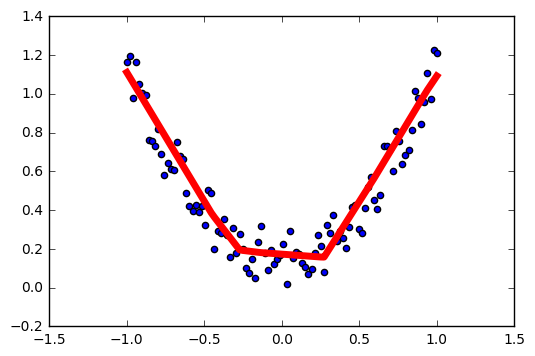

In [83]:
plt.show()